In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()

'C:\\Users\\Dan Masibo\\Desktop\\salary prediction'

In [3]:
df=pd.read_csv("survey_results_public.csv")
df.head(3)

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0


In [4]:
# df.columns

In [5]:
df=df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedCompYearly"]]
df=df.rename({"ConvertedCompYearly":"Salary"}, axis=1)
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
0,NaN,NaN,NaN,NaN,NaN
1,Canada,NaN,NaN,"Employed, full-time",NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
4,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",3,"Employed, full-time",NaN


In [6]:
df=df[df['Salary'].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",5,"Employed, full-time",40205.0
3,Israel,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",215232.0
8,Netherlands,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",49056.0
10,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,"Employed, full-time",60307.0
11,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",10,"Employed, full-time;Independent contractor, fr...",194400.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38071 entries, 2 to 73121
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       38071 non-null  object 
 1   EdLevel       38054 non-null  object 
 2   YearsCodePro  37935 non-null  object 
 3   Employment    38067 non-null  object 
 4   Salary        38071 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.7+ MB


In [8]:
df=df.dropna()
df.isnull().sum().sum()

0

In [9]:
df['Employment'].unique()

array(['Employed, full-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed',
       'Independent contractor, freelancer, or self-employed',
       'Employed, part-time',
       'Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time',
       'Employed, full-time;Employed, part-time', 'I prefer not to say',
       'Independent contractor, freelancer, or self-employed;Retired',
       'Retired', 'Employed, part-time;Retired',
       'Employed, full-time;Retired',
       'Employed, full-time;Independent contractor, freelancer, or self-employed;Retired'],
      dtype=object)

In [10]:
df=df[df['Employment'] == 'Employed, full-time']
df=df.drop('Employment', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31382 entries, 2 to 73121
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       31382 non-null  object 
 1   EdLevel       31382 non-null  object 
 2   YearsCodePro  31382 non-null  object 
 3   Salary        31382 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [11]:
df['Country'].value_counts()

United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
                                                        ... 
Haiti                                                      1
Zambia                                                     1
Suriname                                                   1
Somalia                                                    1
Seychelles                                                 1
Name: Country, Length: 155, dtype: int64

In [12]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [13]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                                                   8643
United States of America                                7858
Germany                                                 2382
United Kingdom of Great Britain and Northern Ireland    2341
India                                                   1869
Canada                                                  1249
France                                                  1126
Brazil                                                  1014
Spain                                                    858
Netherlands                                              701
Australia                                                700
Italy                                                    667
Poland                                                   572
Sweden                                                   561
Russian Federation                                       425
Switzerland                                              416
Name: Country, dtype: in

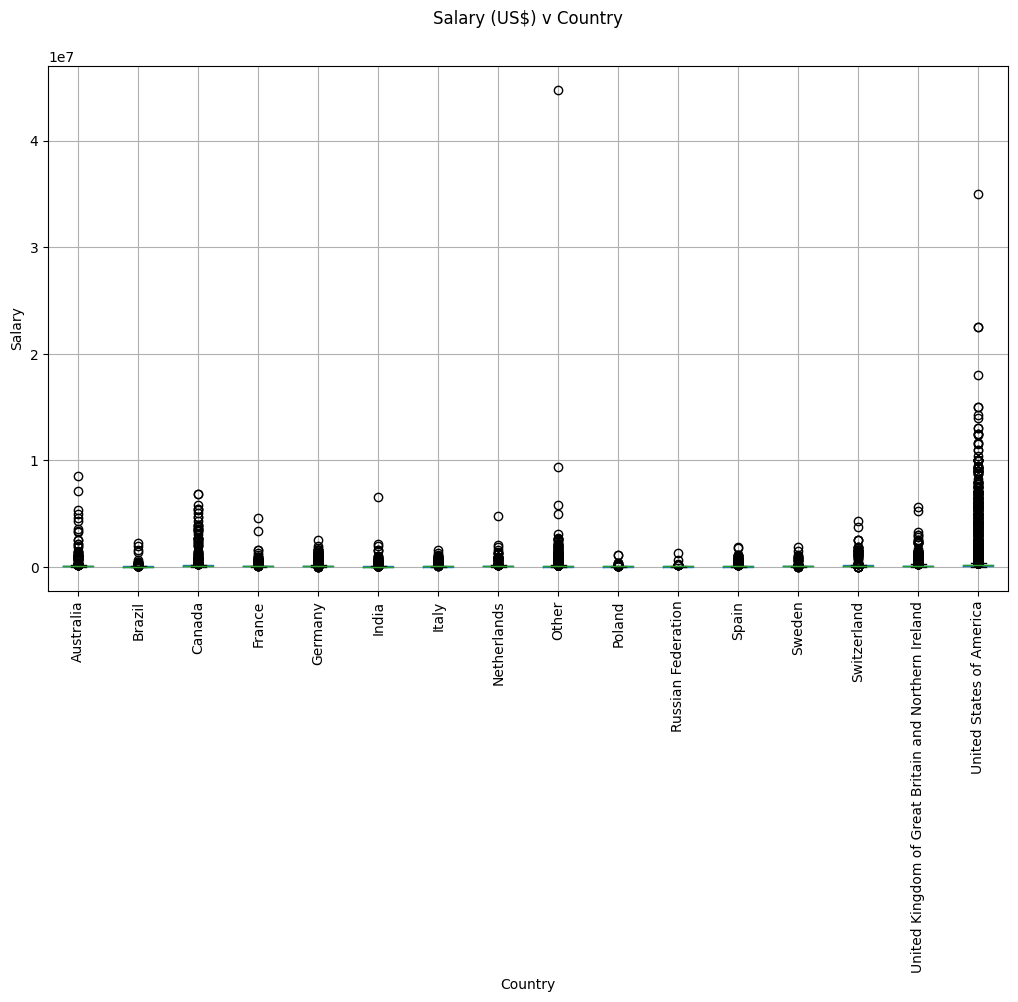

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [15]:
df=df[df['Salary']<=250000]
df=df[df['Salary']>=10000]
df=df[df['Country'] !='Other']

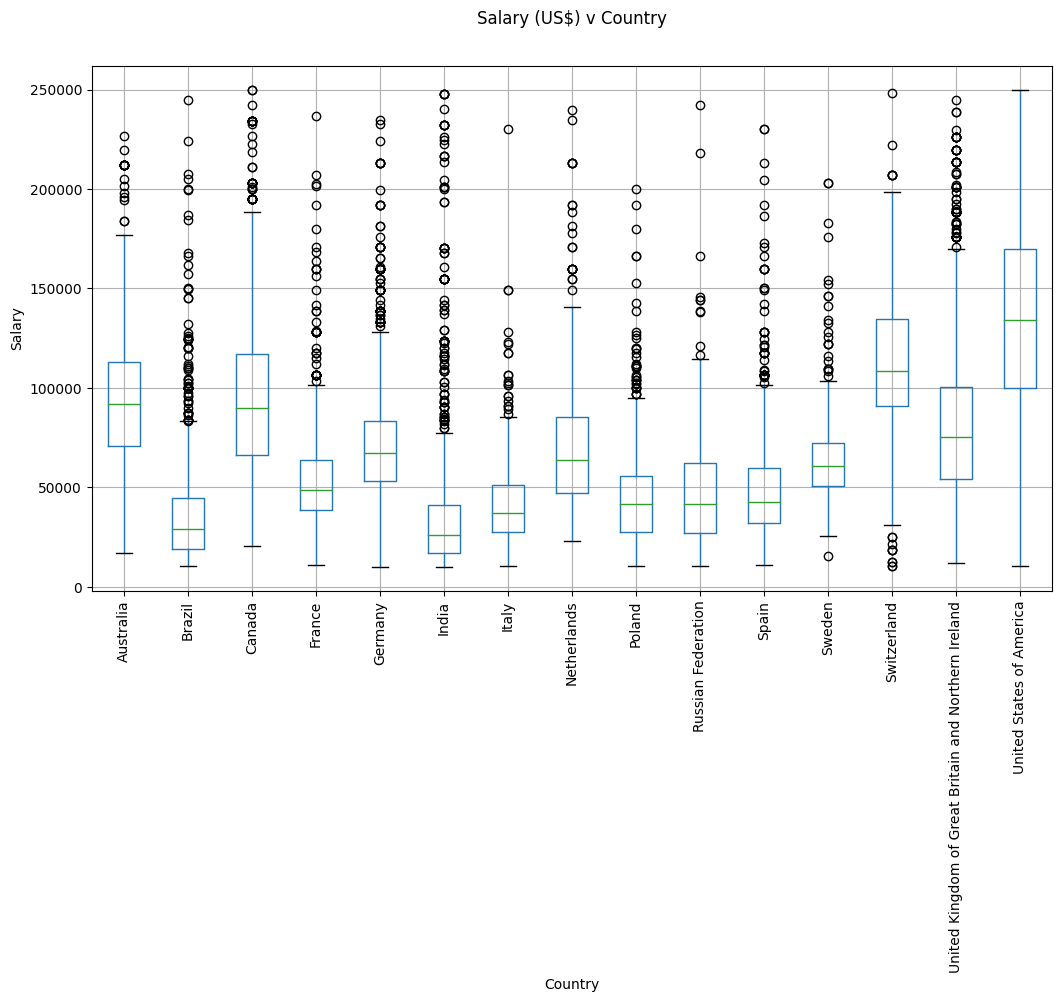

In [16]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [17]:
df['YearsCodePro'].unique()

array(['5', '6', '2', '4', '20', '9', '14', '21', '15', '25', '3', '10',
       '8', '12', '7', '19', '17', '24', '1', '11', '23',
       'Less than 1 year', '18', '37', '46', '22', '32', '13', '27', '28',
       '16', '31', '34', '35', '26', '42', '38', '30', '36', '40', '41',
       '29', '33', '39', '48', '45', '44', '43', 'More than 50 years',
       '47', '49', '50'], dtype=object)

In [18]:
def clean_experience(x):
    if x == 'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)
    
df['YearsCodePro']= df['YearsCodePro'].apply(clean_experience)     

In [19]:
df['YearsCodePro'].unique()

array([ 5. ,  6. ,  2. ,  4. , 20. ,  9. , 14. , 21. , 15. , 25. ,  3. ,
       10. ,  8. , 12. ,  7. , 19. , 17. , 24. ,  1. , 11. , 23. ,  0.5,
       18. , 37. , 46. , 22. , 32. , 13. , 27. , 28. , 16. , 31. , 34. ,
       35. , 26. , 42. , 38. , 30. , 36. , 40. , 41. , 29. , 33. , 39. ,
       48. , 45. , 44. , 43. , 50. , 47. , 49. ])

In [20]:
df["EdLevel"]=df["EdLevel"].str.strip()
df["EdLevel"].unique()

array(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)', 'Something else',
       'Associate degree (A.A., A.S., etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'Primary/elementary school'], dtype=object)

In [21]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [22]:
df['EdLevel'].unique()

array(['Master’s degree', 'Bachelor’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le_ed=LabelEncoder()
df['EdLevel']=le_ed.fit_transform(df['EdLevel'])
print(df['EdLevel'].unique())
# le_ed.classes_

[2 0 1 3]


In [25]:
le_ed.classes_

array(['Bachelor’s degree', 'Less than a Bachelors', 'Master’s degree',
       'Post grad'], dtype=object)

In [26]:
le_country=LabelEncoder()
df['Country']=le_country.fit_transform(df['Country'])
df['Country'].unique()

array([13,  7, 14,  6,  2,  4,  8,  3,  1, 11, 10,  5, 12,  0,  9])

In [27]:
df.head()

,Country,EdLevel,YearsCodePro,Salary
2,13,2,5.0,40205.0
8,7,2,6.0,49056.0
10,13,0,2.0,60307.0
12,14,0,5.0,65000.0
21,6,2,4.0,34126.0


In [28]:
X=df.drop("Salary", axis=1)
y=df['Salary']

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
lin_reg=LinearRegression()
lin_reg.fit(X, y.values)

LinearRegression()

In [31]:
y_pred=lin_reg.predict(X)

In [32]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [33]:
print(f"mean_squared_error: ${np.sqrt(round(mean_squared_error(y,y_pred)))} USD")
print(f"mean_absolute_error:${np.sqrt(round(mean_absolute_error(y, y_pred)))} USD")

mean_squared_error: $44689.67485896491 USD
mean_absolute_error:$187.22446421341417 USD


In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
dec_tree_reg=DecisionTreeRegressor(random_state=0)
dec_tree_reg.fit(X, y.values)

DecisionTreeRegressor(random_state=0)

In [36]:
y_pred=dec_tree_reg.predict(X)

In [37]:
print(f"mean_squared_error: ${round(np.sqrt((mean_squared_error(y,y_pred))), 2)} USD")
print(f"mean_absolute_error: ${round(np.sqrt((mean_absolute_error(y, y_pred))), 2)} USD")

mean_squared_error: $33529.8 USD
mean_absolute_error: $153.96 USD


In [48]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
rf=RandomForestRegressor(random_state=0)
rf.fit(X, y.values)

RandomForestRegressor(random_state=0)

In [50]:
y_pred=rf.predict(X)

In [51]:
print(f"mean_squared_error: ${round(np.sqrt((mean_squared_error(y,y_pred))), 2)} USD")

mean_squared_error: $33611.93 USD


In [52]:
from sklearn.model_selection import GridSearchCV

max_depth= [None, 2, 4, 6, 8, 10, 12]
parameters={'max_depth': max_depth}

regressor=DecisionTreeRegressor(random_state=0)
gs=GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X, y.values)

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [72]:
regressor=gs.best_estimator_
regressor.fit(X, y.values)
y_pred=regressor.predict(X)
error=np.sqrt(mean_squared_error(y, y_pred))
print("${:,.02f}".format(error))

$34,864.27


In [54]:
X

,Country,EdLevel,YearsCodePro
2,13,2,5.0
8,7,2,6.0
10,13,0,2.0
12,14,0,5.0
21,6,2,4.0
...,...,...,...
73113,14,2,5.0
73116,14,0,16.0
73119,14,0,1.0
73120,10,0,2.0


In [55]:
# Country, edLevel, YearsCode
x=np.array([['United States of America', 'Master’s degree', 15]])
x

array([['United States of America', 'Master’s degree', '15']],
      dtype='<U24')

In [56]:
x[:, 0]=le_country.transform(x[:, 0])
x[:, 1] = le_ed.transform(x[:, 1])
x= x.astype(float)
x

array([[14.,  2., 15.]])

In [73]:
y_pred=regressor.predict(x)
y_pred

C:\Users\Dan Masibo\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([162044.17808219])

In [57]:
import pickle

In [58]:
data = {"model": regressor, "le_country": le_country, "le_ed": le_ed}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [59]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
le_country = data["le_country"]
le_ed = data["le_ed"]

In [65]:
y_pred = regressor_loaded.predict(x)
y_pred

C:\Users\Dan Masibo\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([162044.17808219])